In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
pd.options.plotting.backend = "plotly"

# using pmdarima's train test split
from pmdarima.model_selection import train_test_split

In [9]:
# load all dataframes
cgm_df = pd.read_parquet("Parquet Files/cgm_df.parquet.gzip")
final_df = pd.read_parquet("Parquet Files/final_df.parquet.gzip")
full_day_min_cgm = pd.read_parquet("Parquet Files/full_day_min_cgm.parquet.gzip")

In [10]:
# final day of test set for validation
TEST_SIZE_PERCENT = 0.16667

# split using pmdarima's TTS to not shuffle data
y_train, y_test = train_test_split(full_day_min_cgm, test_size=TEST_SIZE_PERCENT)

print(f"Training set shape: {y_train.shape}")
print(f"Test set shape: {y_test.shape}")

Training set shape: (1439, 1)
Test set shape: (289, 1)


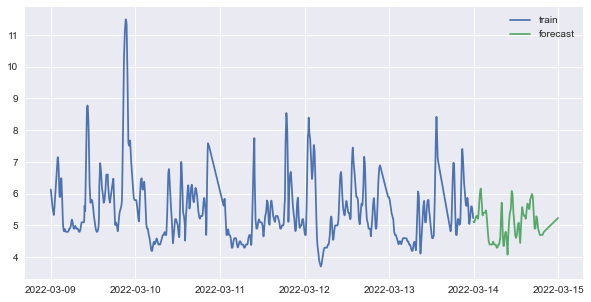

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_train, label='train')
ax.plot(y_test, label='forecast')
ax.legend()

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(y_train.index, y_train,
        eval_set=[(y_train.index, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

In [14]:
all_df

NameError: name 'all_df' is not defined